# 🌐 Understanding Social Networks: Analyzing and Predicting Connections with NetworkX 📈

## Introduction

##### In today's interconnected world, social networks play a pivotal role in shaping our interactions and relationships. Understanding the structure and dynamics of these networks can provide valuable insights into how information spreads, how communities form, and even how future connections might be established. In this article, we explore how to analyze social networks using graph theory concepts and make predictions about future friendships using the powerful Python library NetworkX.

## 📝 Project Overview


##### The primary goal of this project is to leverage social network analysis techniques to understand the intricacies of a network and predict potential future connections. By constructing network graphs from data, analyzing their properties, and visualizing the results, we aim to uncover hidden patterns and insights that can inform decision-making and strategy.

## 📊 Data Acquisition and Preprocessing

##### For this project, we utilized synthetic data representing a social network, which includes user attributes and relationships (e.g., likes, follows). This data was generated using the Faker library, ensuring a realistic yet controlled dataset for our analysis. The preprocessing steps involved cleaning the data, integrating user attributes, and preparing it for graph construction.

In [ ]:
from faker import Faker
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import seaborn as sns
import plotly.express as px
from geopy.geocoders import Nominatim

In [2]:
fake = Faker()
num_users = 100
users = []
for _ in range(num_users):
    profile = fake.profile(fields=['name', 'mail', 'username', 'sex', 'birthdate'])
    profile['location'] = fake.city()
    profile['registration_date'] = fake.date_this_decade()
    profile['mobile_number'] = fake.phone_number()
    profile['job'] = fake.job()
    profile['company'] = fake.company()
    users.append(profile)

users_df = pd.DataFrame(users)
print(users_df.head())

                 username          name sex                      mail  \
0            steventhomas    David Bush   M    maciastrevor@gmail.com   
1  fitzpatrickchristopher    Kelly Reed   F   garciarichard@yahoo.com   
2                djohnson     Holly Kim   F  nicoleschaefer@yahoo.com   
3                 tmccall  Jacob Adkins   M     toddmatthew@yahoo.com   
4            laurencooper  Ryan Salazar   M    lopezcolleen@yahoo.com   

    birthdate         location registration_date          mobile_number  \
0  1939-01-30  South Glennland        2022-07-03  001-441-812-7707x1414   
1  1954-02-03        West Dawn        2023-06-14      889.563.6805x7213   
2  1948-05-02       Joshuaside        2021-04-03       591-805-1058x141   
3  1974-04-25      Port Jeanne        2021-12-06     (461)402-5207x4096   
4  1935-02-21   Johnsonchester        2023-06-24           890.306.1273   

                                      job                       company  
0                     Administrator,

## 🕸️ Building the Network Graph

In [3]:
edges = []
for _ in range(num_users * 2):
    user1 = random.choice(users_df['username'])
    user2 = random.choice(users_df['username'])
    if user1 != user2:
        edge = {
            'user1': user1,
            'user2': user2,
            'liked': fake.boolean(),
            'timestamp': fake.date_time_this_year()
        }
        edges.append(edge)

edges_df = pd.DataFrame(edges)
print(edges_df.head())

                    user1          user2  liked           timestamp
0               michael95       hannah99  False 2024-02-09 03:40:01
1  fitzpatrickchristopher      lsheppard   True 2024-04-13 02:14:37
2                  wkelly        emiller  False 2024-01-12 04:31:59
3                   sreid  millerkristin  False 2024-07-07 09:35:53
4                 qtaylor     jamesevans  False 2024-02-01 08:02:37


In [4]:
len(users_df)

100

In [5]:
len(edges_df)

198

In [6]:
edges_df['user1'].unique()

array(['michael95', 'fitzpatrickchristopher', 'wkelly', 'sreid',
       'qtaylor', 'wigginsandrew', 'kingamanda', 'james03', 'hallcharles',
       'ronald03', 'blakedean', 'tmccall', 'thorntonjessica',
       'mccallmary', 'plopez', 'lambjames', 'adamfox', 'lutzjay',
       'swansonjerry', 'kelseyhernandez', 'millerkristin', 'twatson',
       'laura10', 'robert31', 'sbryant', 'mitchellcynthia',
       'wallermichael', 'qgilbert', 'fsmith', 'anna57', 'zsnyder',
       'bradley85', 'qclark', 'ggarrett', 'diamondboyd', 'jonesdean',
       'jhart', 'lopezmaria', 'mark75', 'emily27', 'shelbypatrick',
       'jordanjason', 'hannah99', 'greg39', 'andrew83', 'djohnson',
       'dgallegos', 'edward73', 'jamesevans', 'ochang', 'katie54',
       'hernandezdeborah', 'srussell', 'mitchellhenderson', 'nathandavis',
       'xali', 'lsheppard', 'smithmichael', 'markwiley', 'kaitlynhinton',
       'michaelcampbell', 'schmidtstacey', 'shannon62', 'qmccall',
       'tylercrosby', 'ronald23', 'waltonchris

## 🔍 Social Network Analysis

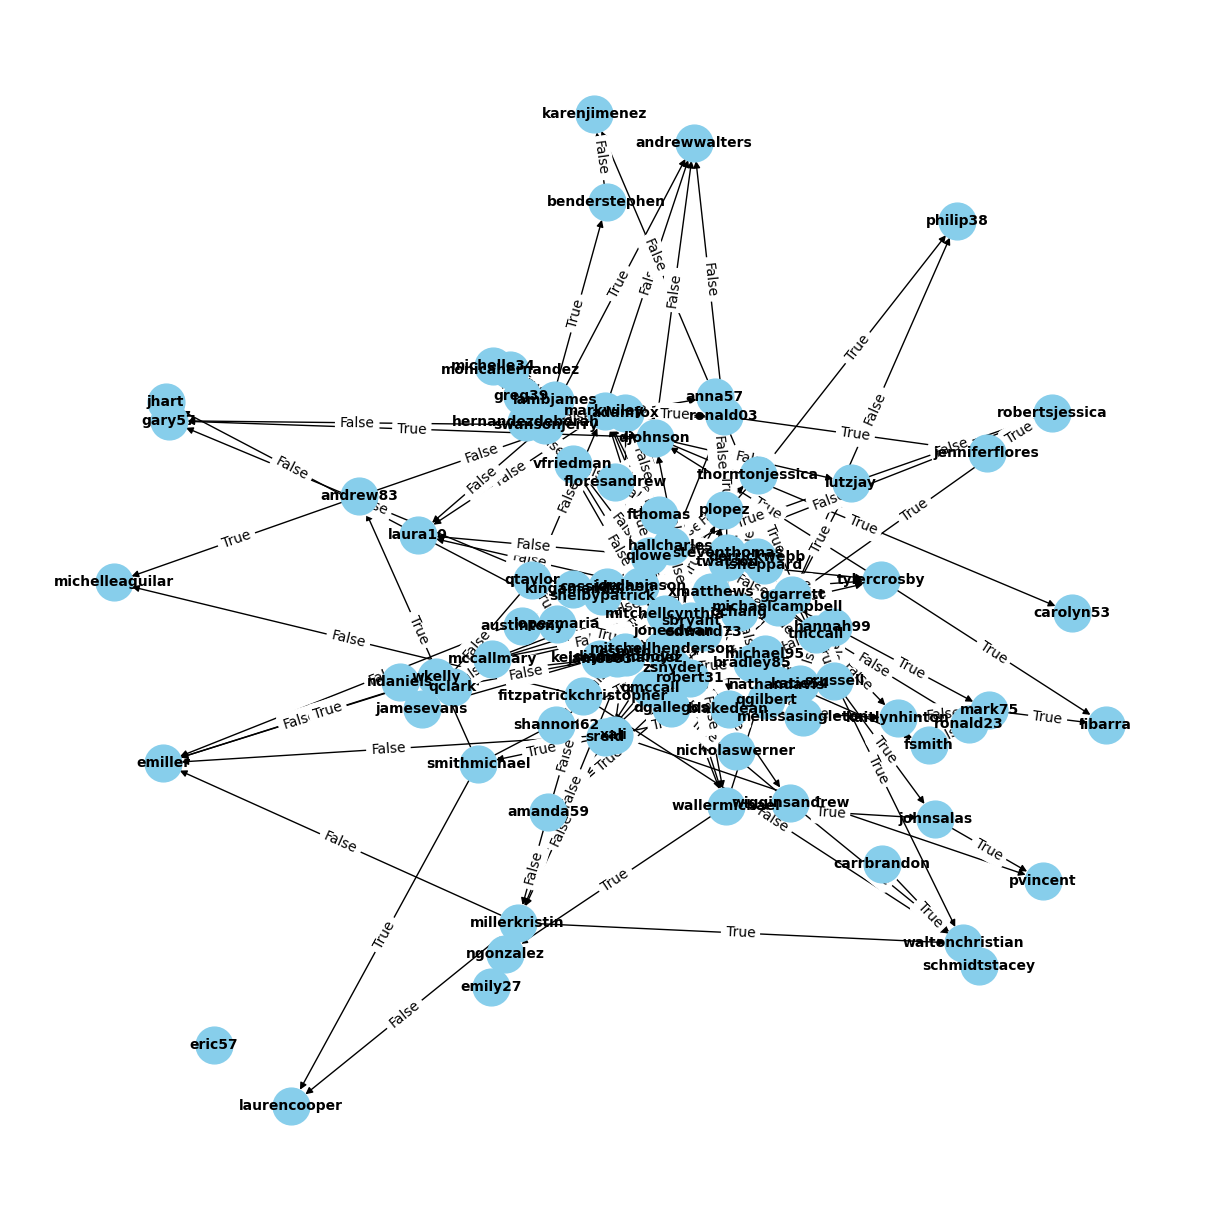

In [8]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes
for _, row in users_df.iterrows():
    G.add_node(row['username'], 
               name=row['name'], 
               location=row['location'], 
               mobile_number=row['mobile_number'], 
               job=row['job'], 
               company=row['company'])

# Add edges with attributes
for _, row in edges_df.iterrows():
    G.add_edge(row['user1'], row['user2'], liked=row['liked'], timestamp=row['timestamp'])

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, 'liked')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [9]:
G = nx.DiGraph()

# Add nodes
for _, row in users_df.iterrows():
    G.add_node(row['username'], 
               name=row['name'], 
               location=row['location'], 
               mobile_number=row['mobile_number'], 
               job=row['job'], 
               company=row['company'])

# Add edges
for _, row in edges_df.iterrows():
    G.add_edge(row['user1'], row['user2'], liked=row['liked'], timestamp=row['timestamp'])

In [10]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
average_degree = sum(dict(G.degree()).values()) / num_nodes

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {average_degree:.2f}")

Number of nodes: 100
Number of edges: 196
Average degree: 3.92


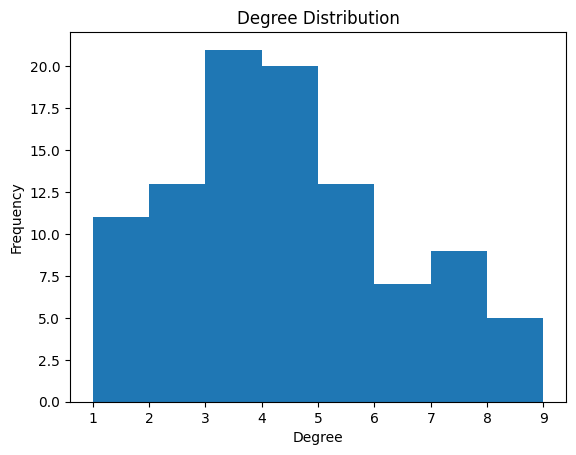

In [11]:
degrees = [val for (node, val) in G.degree()]
plt.figure()
plt.hist(degrees, bins=range(1, max(degrees) + 1))
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

## 🤝 Clustering Coefficients

##### By examining clustering coefficients, we gained insights into the tendency of users to form tightly-knit communities. This information is crucial for understanding the community structure within the network.

In [12]:
clustering_coeffs = nx.clustering(G.to_undirected())
average_clustering_coeff = sum(clustering_coeffs.values()) / num_nodes

print(f"Average clustering coefficient: {average_clustering_coeff:.2f}")

Average clustering coefficient: 0.02


In [13]:
if not nx.is_directed(G):
    components = list(nx.connected_components(G.to_undirected()))
else:
    components = list(nx.strongly_connected_components(G))

largest_component = max(components, key=len)

print(f"Number of connected components: {len(components)}")
print(f"Size of largest component: {len(largest_component)}")


Number of connected components: 41
Size of largest component: 58


In [14]:
components

[{'iibarra'},
 {'mark75'},
 {'ronald23'},
 {'robertsjessica'},
 {'emiller'},
 {'pvincent'},
 {'johnsalas'},
 {'schmidtstacey', 'waltonchristian'},
 {'laurencooper'},
 {'millerkristin'},
 {'michelleaguilar'},
 {'andrewwalters'},
 {'gary57', 'jhart'},
 {'karenjimenez'},
 {'benderstephen'},
 {'kaitlynhinton'},
 {'carolyn53'},
 {'cassidychen'},
 {'philip38'},
 {'jenniferflores'},
 {'ngonzalez'},
 {'adamfox',
  'amanda59',
  'andrew83',
  'anna57',
  'blakedean',
  'derrickwebb',
  'dgallegos',
  'diamondboyd',
  'djohnson',
  'edward73',
  'esmith',
  'fitzpatrickchristopher',
  'floresandrew',
  'fthomas',
  'ggarrett',
  'greg39',
  'hallcharles',
  'hannah99',
  'hernandezdeborah',
  'james03',
  'jamesevans',
  'jonesdean',
  'kelseyhernandez',
  'laura10',
  'lopezmaria',
  'lsheppard',
  'lutzjay',
  'markwiley',
  'mccallmary',
  'michaelcampbell',
  'michelle34',
  'mitchellcynthia',
  'mitchellhenderson',
  'ochang',
  'plopez',
  'qclark',
  'qlowe',
  'qmccall',
  'qtaylor',
  '

In [15]:
largest_component = max(components, key=len)

print(f"Number of connected components: {len(components)}")
print(f"Size of largest component: {len(largest_component)}")

Number of connected components: 41
Size of largest component: 58


## Shortest Path

In [16]:
if nx.is_directed(G):
    sp_length = dict(nx.all_pairs_shortest_path_length(G))
else:
    sp_length = dict(nx.all_pairs_shortest_path_length(G.to_undirected()))

all_lengths = []
for node, length_dict in sp_length.items():
    for target, length in length_dict.items():
        all_lengths.append(length)

average_path_length = sum(all_lengths) / len(all_lengths)
print(f"Average shortest path length: {average_path_length:.2f}")

Average shortest path length: 5.40


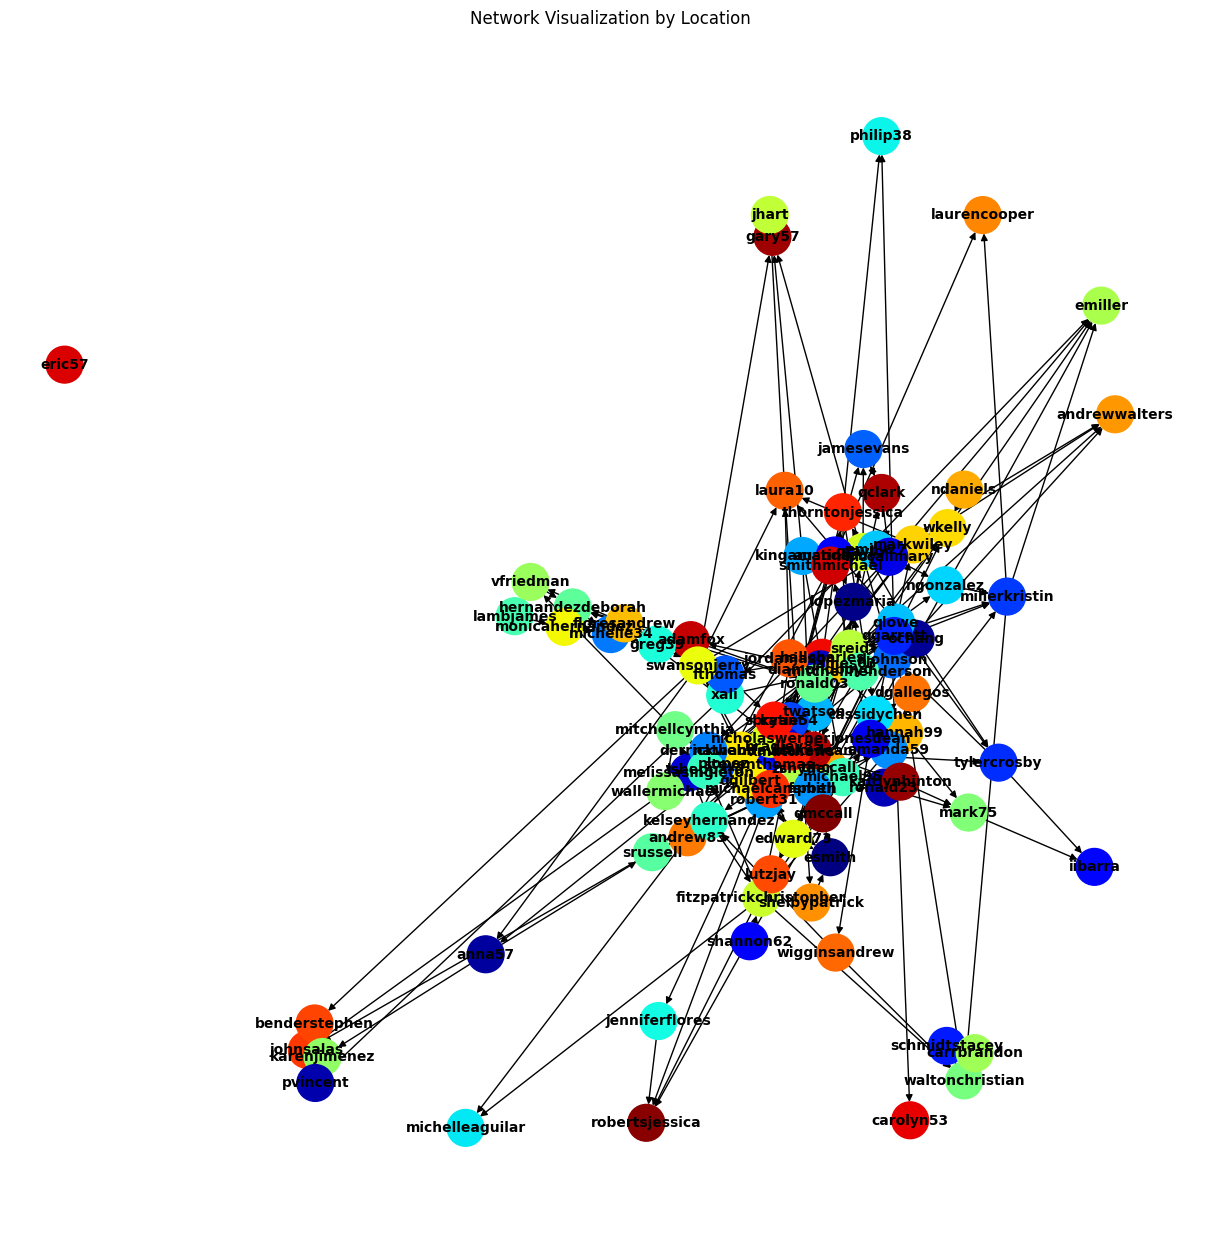

In [17]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
colors = [node[1]['location'] for node in G.nodes(data=True)]
unique_colors = list(set(colors))
color_map = {color: i for i, color in enumerate(unique_colors)}
node_colors = [color_map[color] for color in colors]

nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_colors, cmap=plt.cm.jet, font_size=10, font_weight="bold")
plt.title('Network Visualization by Location')
plt.show()

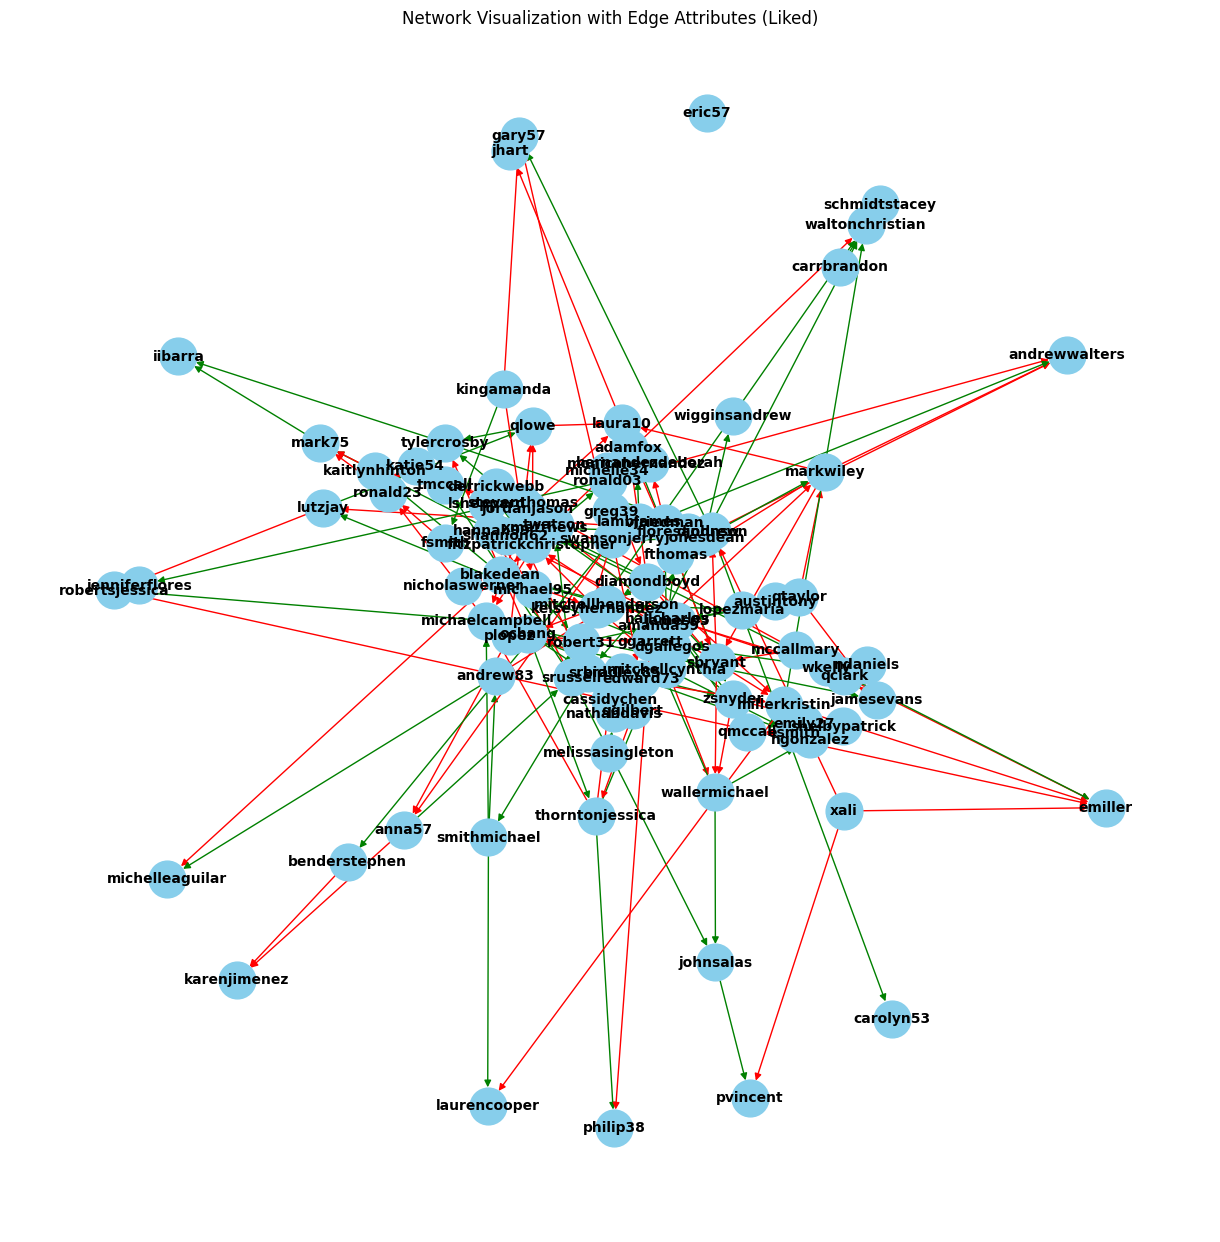

In [18]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
edge_colors = ['green' if G[u][v]['liked'] else 'red' for u, v in G.edges()]

nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", edge_color=edge_colors, font_size=10, font_weight="bold")
plt.title('Network Visualization with Edge Attributes (Liked)')
plt.show()

C:\Users\thein\AppData\Local\Temp\ipykernel_20624\4150224514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')


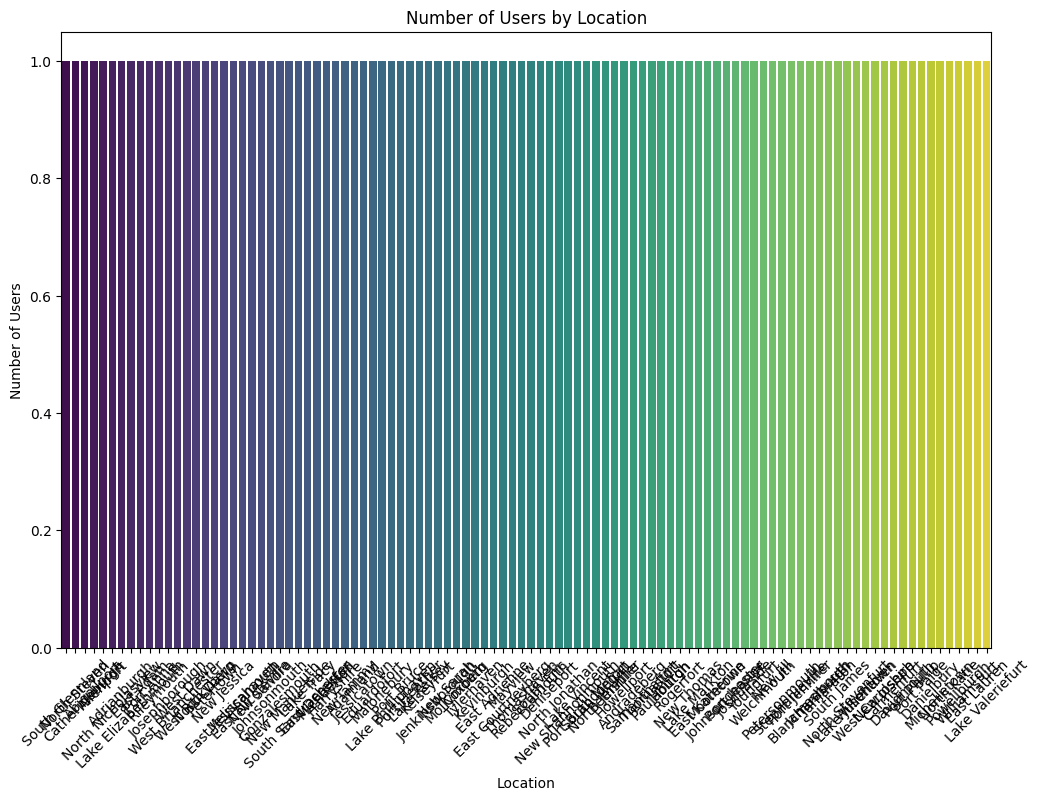

In [20]:
# Count users by location
location_counts = users_df['location'].value_counts()

# Bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Number of Users by Location')
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


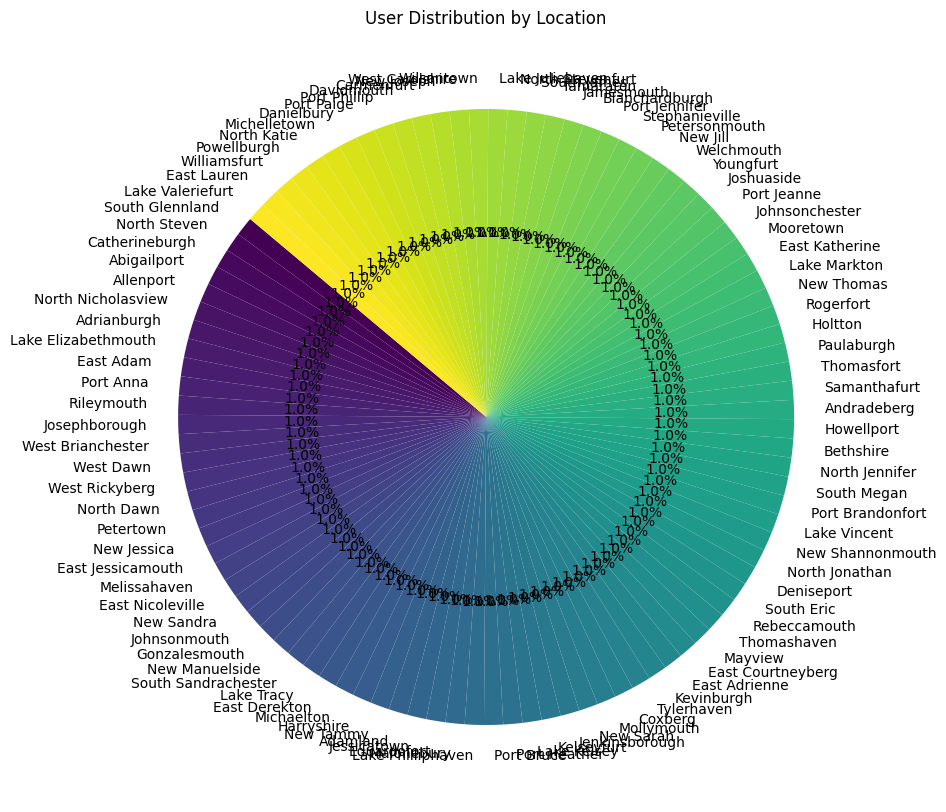

In [21]:
# Pie chart using Matplotlib
plt.figure(figsize=(10, 10))
location_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('User Distribution by Location')
plt.ylabel('')
plt.show()

In [22]:
# Add latitude and longitude to the dataset
# This can be done using a service like Geopy to convert city names to coordinates
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

def get_coordinates(city):
    try:
        location = geolocator.geocode(city)
        return (location.latitude, location.longitude)
    except:
        return (None, None)

users_df['coordinates'] = users_df['location'].apply(get_coordinates)
users_df['latitude'] = users_df['coordinates'].apply(lambda x: x[0])
users_df['longitude'] = users_df['coordinates'].apply(lambda x: x[1])
users_df.drop(columns=['coordinates'], inplace=True)

# Filter out rows where coordinates could not be found
users_df = users_df.dropna(subset=['latitude', 'longitude'])

# Plotly map
fig = px.scatter_geo(users_df, 
                     lat='latitude', 
                     lon='longitude', 
                     hover_name='username',
                     hover_data={'location': True, 'mobile_number': True, 'job': True, 'company': True},
                     title='Geographical Distribution of Users')

fig.update_geos(projection_type="natural earth")
fig.show()

In [23]:
# Assuming users_df is already generated
# Add latitude and longitude to the dataset
geolocator = Nominatim(user_agent="geoapiExercises")

def get_coordinates(city):
    try:
        location = geolocator.geocode(city)
        return (location.latitude, location.longitude)
    except:
        return (None, None)

users_df['coordinates'] = users_df['location'].apply(get_coordinates)
users_df['latitude'] = users_df['coordinates'].apply(lambda x: x[0])
users_df['longitude'] = users_df['coordinates'].apply(lambda x: x[1])
users_df.drop(columns=['coordinates'], inplace=True)

# Filter out rows where coordinates could not be found
users_df = users_df.dropna(subset=['latitude', 'longitude'])

# Create density mapbox
fig = px.density_mapbox(users_df, 
                        lat='latitude', 
                        lon='longitude', 
                        z=None, 
                        radius=10, 
                        hover_name='username',
                        hover_data={'location': True, 'mobile_number': True, 'job': True, 'company': True},
                        mapbox_style="stamen-terrain", 
                        zoom=3,
                        title='Geographical Distribution of Users with Heatmap')

fig.update_layout(mapbox_style="open-street-map")
fig.show()

## 🔑 Centrality Metrics

##### We calculated various centrality metrics (e.g., degree centrality, betweenness centrality) to identify influential users within the network. These metrics help us understand the importance and influence of each user in the network.

In [24]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
print("Top 5 nodes by degree centrality:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("Top 5 nodes by betweenness centrality:")
print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
print("Top 5 nodes by closeness centrality:")
print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
print("Top 5 nodes by eigenvector centrality:")
print(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Top 5 nodes by degree centrality:
[('fitzpatrickchristopher', 0.09090909090909091), ('james03', 0.09090909090909091), ('hallcharles', 0.08080808080808081), ('michaelcampbell', 0.08080808080808081), ('swansonjerry', 0.08080808080808081)]
Top 5 nodes by betweenness centrality:
[('zsnyder', 0.1686736166328003), ('hallcharles', 0.13867513816493401), ('xmatthews', 0.12626777983920837), ('laura10', 0.12172404315261458), ('fitzpatrickchristopher', 0.09540300968872392)]
Top 5 nodes by closeness centrality:
[('andrewwalters', 0.19432593078802465), ('waltonchristian', 0.19204545454545452), ('robertsjessica', 0.19002736394040742), ('laura10', 0.1830896376350922), ('wallermichael', 0.1824516946468166)]
Top 5 nodes by eigenvector centrality:
[('waltonchristian', 0.3430386398975108), ('gary57', 0.22808194402476042), ('robertsjessica', 0.21118756223493768), ('jhart', 0.2100295888338796), ('djohnson', 0.19925044152483032)]


In [25]:
from networkx.algorithms.community import girvan_newman

# Girvan-Newman Community Detection
communities = girvan_newman(G)
top_level_communities = next(communities)
sorted(map(sorted, top_level_communities))

[['adamfox',
  'amanda59',
  'andrew83',
  'andrewwalters',
  'anna57',
  'austintony',
  'benderstephen',
  'blakedean',
  'bradley85',
  'carolyn53',
  'carrbrandon',
  'cassidychen',
  'derrickwebb',
  'dgallegos',
  'diamondboyd',
  'djohnson',
  'edward73',
  'emiller',
  'emily27',
  'esmith',
  'fitzpatrickchristopher',
  'floresandrew',
  'fsmith',
  'fthomas',
  'gary57',
  'ggarrett',
  'hallcharles',
  'hannah99',
  'hernandezdeborah',
  'iibarra',
  'james03',
  'jamesevans',
  'jenniferflores',
  'jhart',
  'johnsalas',
  'jonesdean',
  'jordanjason',
  'kaitlynhinton',
  'karenjimenez',
  'katie54',
  'kelseyhernandez',
  'kingamanda',
  'laura10',
  'laurencooper',
  'lopezmaria',
  'lsheppard',
  'lutzjay',
  'mark75',
  'markwiley',
  'mccallmary',
  'melissasingleton',
  'michael95',
  'michaelcampbell',
  'michelleaguilar',
  'millerkristin',
  'mitchellcynthia',
  'mitchellhenderson',
  'nathandavis',
  'ndaniels',
  'ngonzalez',
  'nicholaswerner',
  'ochang',
  'p

C:\Users\thein\AppData\Local\Temp\ipykernel_20624\2052987365.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




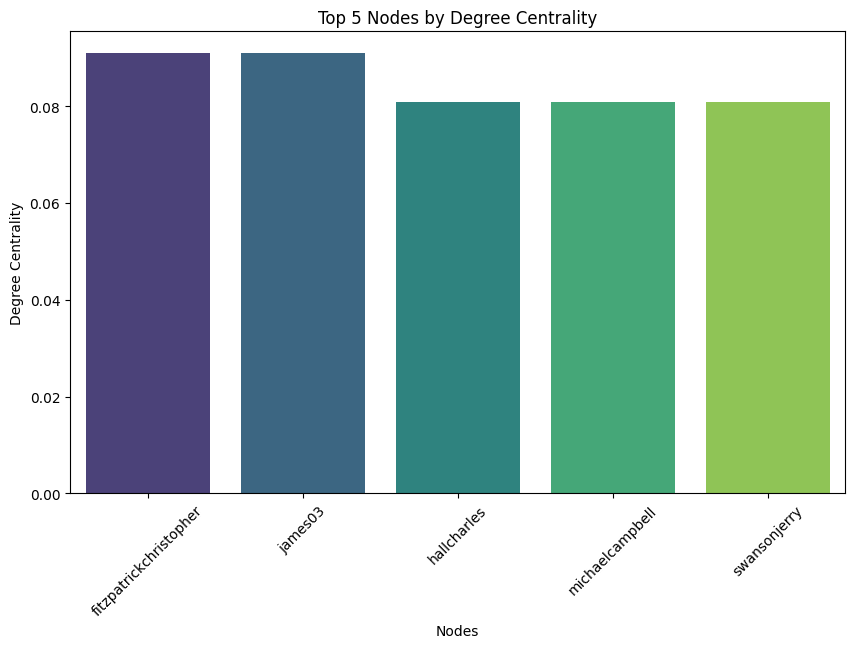

In [26]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Extract nodes and centrality values
nodes, centrality_values = zip(*sorted_degree_centrality)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(nodes), y=list(centrality_values), palette='viridis')
plt.title('Top 5 Nodes by Degree Centrality')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.xticks(rotation=45)
plt.show()

C:\Users\thein\AppData\Local\Temp\ipykernel_20624\2147149836.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




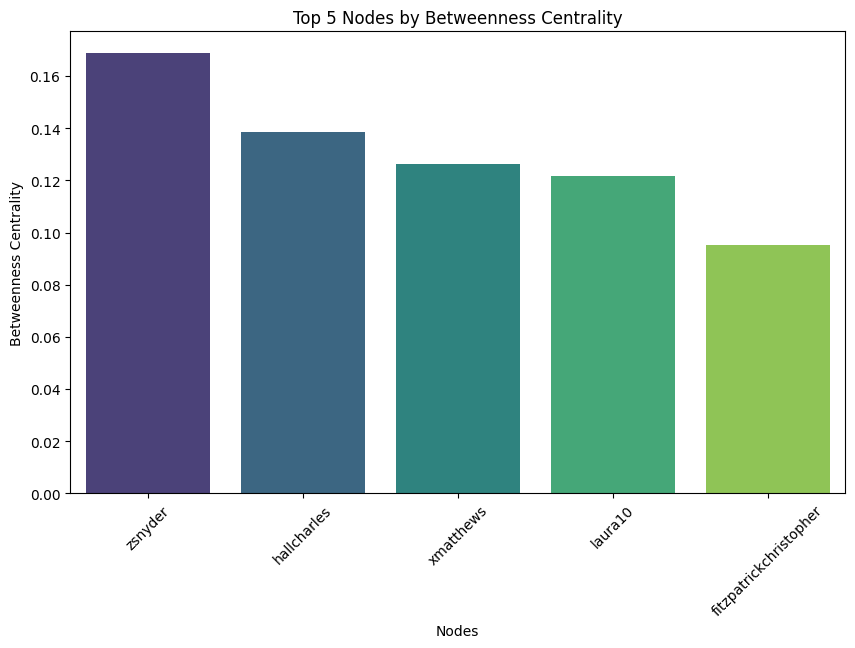

In [27]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Extract nodes and centrality values
nodes, centrality_values = zip(*sorted_betweenness_centrality)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(nodes), y=list(centrality_values), palette='viridis')
plt.title('Top 5 Nodes by Betweenness Centrality')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.xticks(rotation=45)
plt.show()

C:\Users\thein\AppData\Local\Temp\ipykernel_20624\2407504561.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




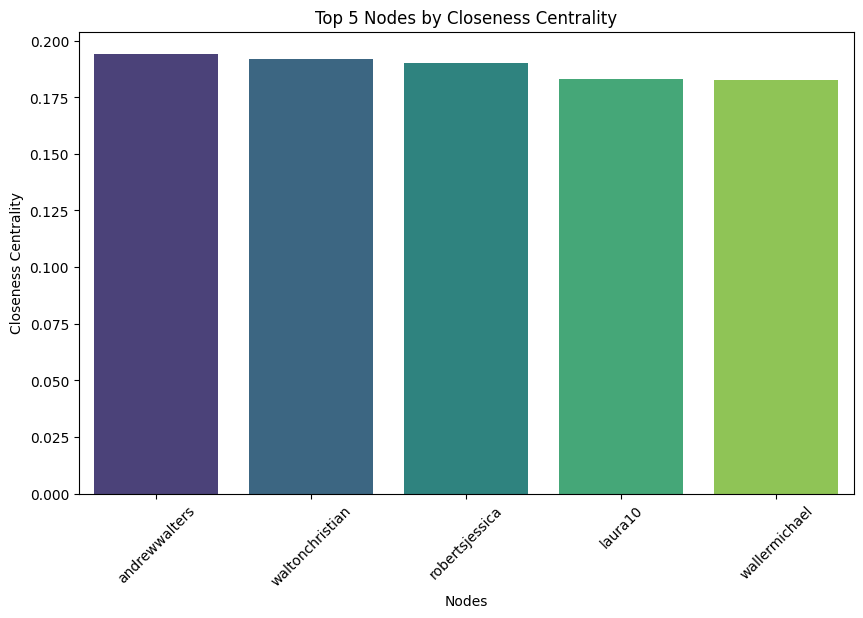

In [28]:
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Extract nodes and centrality values
nodes, centrality_values = zip(*sorted_closeness_centrality)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(nodes), y=list(centrality_values), palette='viridis')
plt.title('Top 5 Nodes by Closeness Centrality')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.xticks(rotation=45)
plt.show()

C:\Users\thein\AppData\Local\Temp\ipykernel_20624\1983232113.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




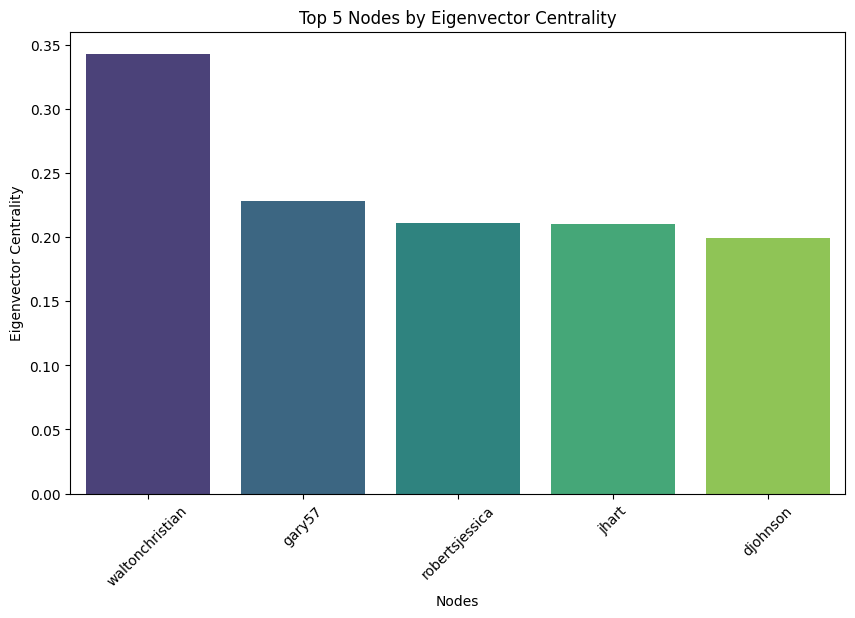

In [29]:
# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Extract nodes and centrality values
nodes, centrality_values = zip(*sorted_eigenvector_centrality)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(nodes), y=list(centrality_values), palette='viridis')
plt.title('Top 5 Nodes by Eigenvector Centrality')
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.xticks(rotation=45)
plt.show()

In [33]:
users_df.head()

,username,name,sex,mail,birthdate,location,registration_date,mobile_number,job,company,latitude,longitude
1,fitzpatrickchristopher,Kelly Reed,F,garciarichard@yahoo.com,1954-02-03,West Dawn,2023-06-14,889.563.6805x7213,Theatre stage manager,Black-Peters,43.520382,-84.109792
3,tmccall,Jacob Adkins,M,toddmatthew@yahoo.com,1974-04-25,Port Jeanne,2021-12-06,(461)402-5207x4096,Optometrist,Acosta-Ortega,-49.551536,69.820189
5,qclark,Francis Oneill,M,markmayo@hotmail.com,2021-02-28,Mooretown,2020-06-24,702-876-9780x50366,Outdoor activities/education manager,Thomas-Jackson,53.496724,-6.511307
6,michael95,Dawn Perez,F,greenbrad@gmail.com,1929-08-09,East Katherine,2020-09-30,552-378-4857x197,Actuary,Bautista-Bonilla,-14.464000,132.287400
8,andrew83,Thomas Weaver,M,donnafuentes@gmail.com,2004-05-01,New Thomas,2023-02-01,+1-766-964-1244,Counselling psychologist,Garcia Ltd,36.245587,-103.292444


In [30]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1 to 98
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   username           36 non-null     object 
 1   name               36 non-null     object 
 2   sex                36 non-null     object 
 3   mail               36 non-null     object 
 4   birthdate          36 non-null     object 
 5   location           36 non-null     object 
 6   registration_date  36 non-null     object 
 7   mobile_number      36 non-null     object 
 8   job                36 non-null     object 
 9   company            36 non-null     object 
 10  latitude           36 non-null     float64
 11  longitude          36 non-null     float64
dtypes: float64(2), object(10)
memory usage: 3.7+ KB


In [31]:
edges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user1      198 non-null    object        
 1   user2      198 non-null    object        
 2   liked      198 non-null    bool          
 3   timestamp  198 non-null    datetime64[ns]
dtypes: bool(1), datetime64[ns](1), object(2)
memory usage: 5.0+ KB


## 🔮 Predicting Future Connections
##### One of the most exciting aspects of this project was predicting potential future friendships. We utilized the Jaccard coefficient, a similarity measure, to identify users who are likely to become friends based on their shared connections. By scoring potential friends and selecting the top recommendations, we could predict future connections that are not direct neighbors of the target user.

In [40]:
# Create a directed graph from edges_df
G = nx.from_pandas_edgelist(edges_df, 'user1', 'user2', ['liked', 'timestamp'], create_using=nx.DiGraph())

# Add user attributes from users_df to the nodes in the graph
node_attrs = users_df.set_index('username').to_dict('index')
nx.set_node_attributes(G, node_attrs)

# Function to recommend friends for a given user
def recommend_friends(G, user, top_n=5):
    # Find direct neighbors (current friends) of the user
    direct_friends = set(G.neighbors(user))
    
    # Find potential friends who are not direct neighbors
    potential_friends = [n for n in G.nodes() if n != user and not G.has_edge(user, n)]
    
    # Calculate Jaccard coefficient as a measure of similarity
    def jaccard_coefficient(G, user, potential_friend):
        neighbors_u = set(G.neighbors(user))
        neighbors_v = set(G.neighbors(potential_friend))
        return len(neighbors_u.intersection(neighbors_v)) / len(neighbors_u.union(neighbors_v))
    
    # Score potential friends based on Jaccard coefficient
    scores = [(friend, jaccard_coefficient(G, user, friend)) for friend in potential_friends]
    
    # Sort scores by Jaccard coefficient in descending order
    scores.sort(key=lambda x: x[1], reverse=True)
    
    # Select top_n recommended friends who are not direct neighbors
    recommended_friends = [(friend, score) for friend, score in scores if friend not in direct_friends][:top_n]
    
    return recommended_friends

# Example usage: Recommend friends for user 'april37'
user = 'james03'
recommended_friends = recommend_friends(G, user)
print(f"Recommended friends for '{user}':")
for friend, score in recommended_friends:
    print(f"User: {friend}, Jaccard Coefficient: {score}")


Recommended friends for 'james03':
User: jamesevans, Jaccard Coefficient: 0.16666666666666666
User: steventhomas, Jaccard Coefficient: 0.16666666666666666
User: nicholaswerner, Jaccard Coefficient: 0.16666666666666666
User: ndaniels, Jaccard Coefficient: 0.16666666666666666
User: twatson, Jaccard Coefficient: 0.14285714285714285


## 📈 Visualizing the Network
##### To visualize the network and the predicted connections, we used Matplotlib to create clear and informative plots. These visualizations included:

- 🌐 Network Graphs: Showing the entire network with all nodes and edges.
- 🚶‍♂️ Shortest Path Visualization: Highlighting the shortest paths from the target user to the recommended friends.
- 🔮 Predicted Connections: Differentiating predicted friends with unique colors to emphasize potential future connections.

No path between james03 and nicholaswerner.
No path between james03 and ndaniels.


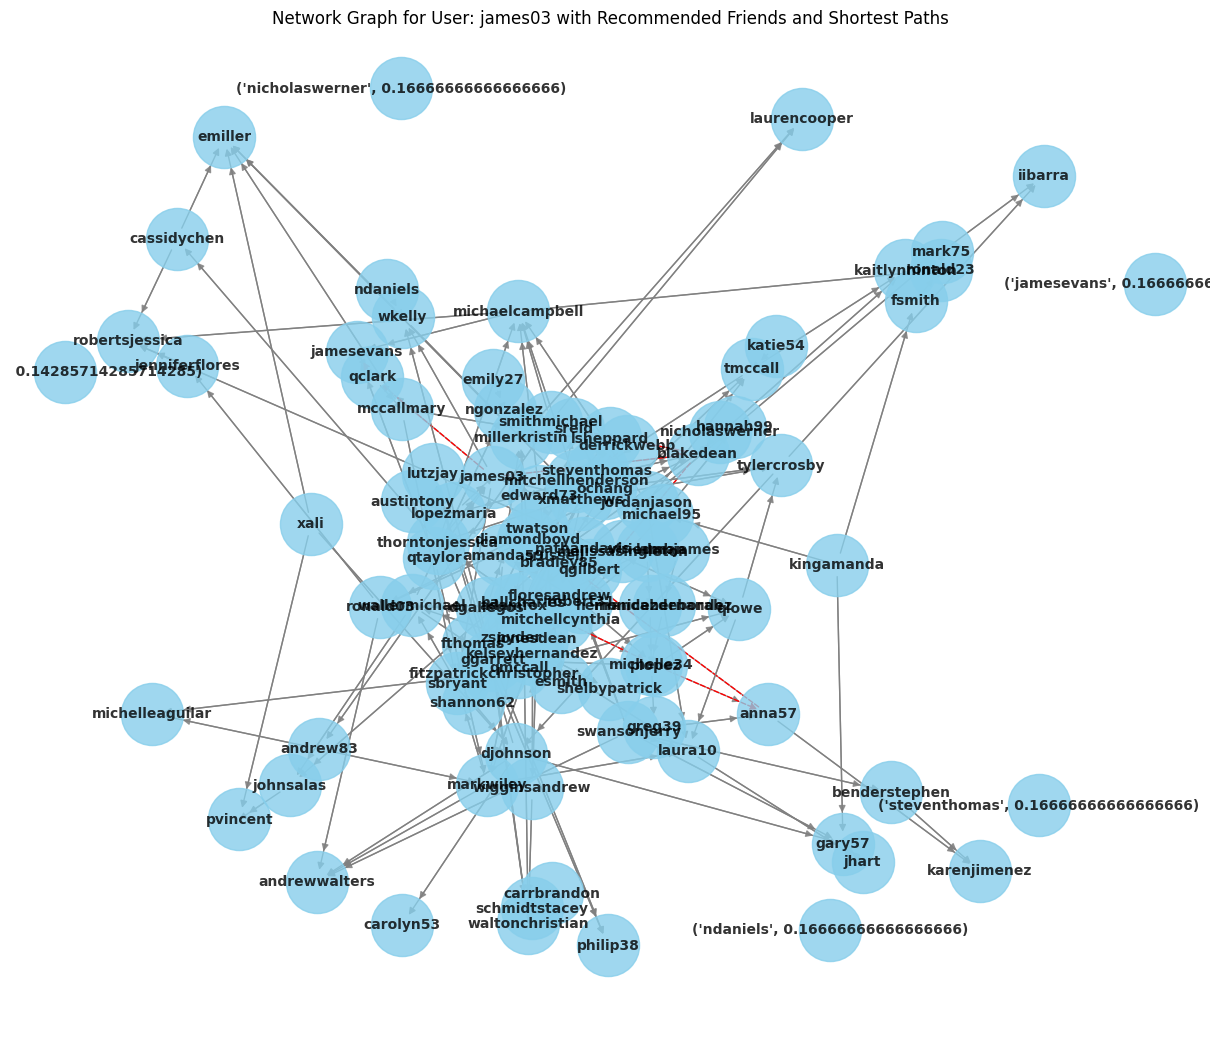

In [44]:
# Function to plot network graph with shortest paths
def plot_network_with_paths(G, user, recommended_friends):
    # Create a copy of the graph to add shortest paths
    H = G.copy()
    
    # Find shortest paths from user to each recommended friend
    shortest_paths = {}
    for friend, _ in recommended_friends:
        try:
            shortest_paths[friend] = nx.shortest_path(H, source=user, target=friend)
        except nx.NetworkXNoPath:
            print(f"No path between {user} and {friend}.")
            shortest_paths[friend] = None  # Mark no path found
    
    # Add recommended friends and shortest paths to the graph
    H.add_nodes_from(recommended_friends)
    for friend, path in shortest_paths.items():
        if path is not None:
            edges = list(zip(path[:-1], path[1:]))
            H.add_edges_from(edges, color='red', style='dashed')

    # Plotting the network graph with shortest paths
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(H, seed=42)
    nx.draw(H, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', linewidths=1, font_size=10, font_weight='bold', alpha=0.8)
    edge_colors = [H[u][v]['color'] if 'color' in H[u][v] else 'gray' for u, v in H.edges()]
    edge_styles = [H[u][v]['style'] if 'style' in H[u][v] else '-' for u, v in H.edges()]
    nx.draw_networkx_edges(H, pos, edgelist=H.edges(), edge_color=edge_colors, style=edge_styles)
    plt.title(f"Network Graph for User: {user} with Recommended Friends and Shortest Paths")
    plt.show()

# Plot network graph with shortest paths for user 'james03'
plot_network_with_paths(G, user, recommended_friends)

No path between james03 and nicholaswerner.
No path between james03 and ndaniels.


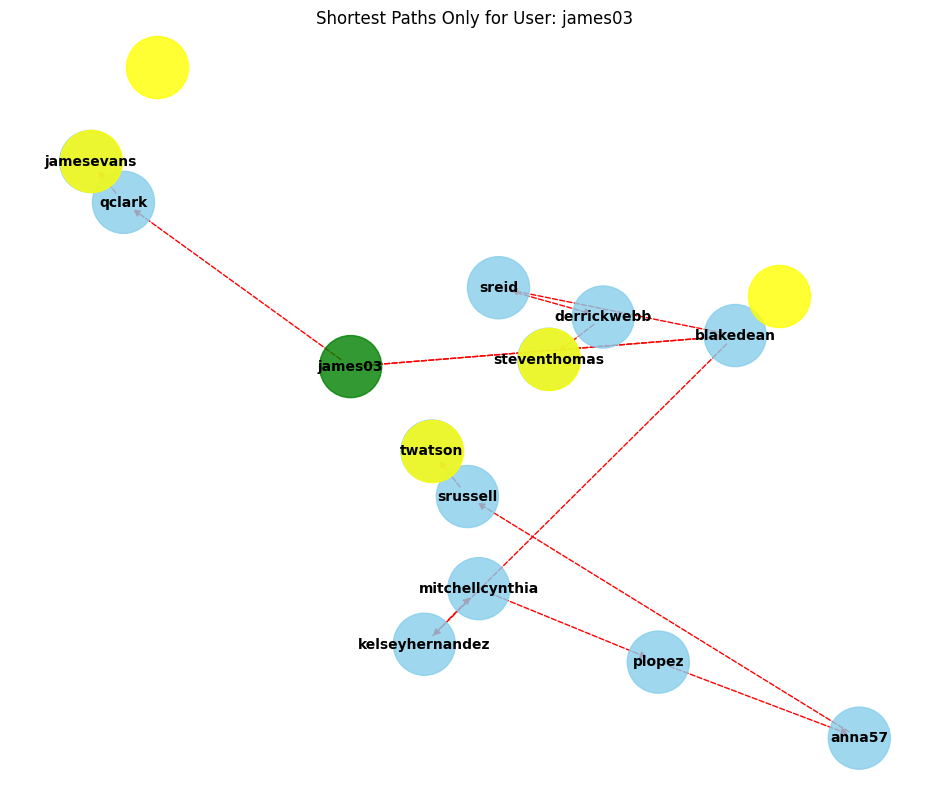

In [50]:
# Function to plot network graph with only shortest paths
def plot_network_with_shortest_paths_only(G, user, recommended_friends):
    # Create a copy of the graph to add shortest paths
    H = G.copy()
    
    # Find shortest paths from user to each recommended friend
    shortest_paths = {}
    for friend, _ in recommended_friends:
        try:
            shortest_paths[friend] = nx.shortest_path(H, source=user, target=friend)
        except nx.NetworkXNoPath:
            print(f"No path between {user} and {friend}.")
            shortest_paths[friend] = None  # Mark no path found
    
    # Filter the graph to include only nodes and edges in shortest paths
    nodes_in_paths = set([user])  # Start with the user
    edges_in_paths = []
    for path in shortest_paths.values():
        if path is not None:
            nodes_in_paths.update(path)  # Add nodes in the path
            edges_in_paths.extend(list(zip(path[:-1], path[1:])))  # Add edges in the path
    
    # Plotting the network graph with only nodes and edges in shortest paths
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(H, seed=42)
    
    # Draw nodes in shortest paths
    node_color = ['green' if node == user else 'skyblue' for node in nodes_in_paths]
    nx.draw_networkx_nodes(H, pos, nodelist=nodes_in_paths, node_color=node_color, node_size=2000, alpha=0.8)
    
    # Draw edges in shortest paths
    nx.draw_networkx_edges(H, pos, edgelist=edges_in_paths, edge_color='red', style='dashed')
    
    # Draw labels for nodes in shortest paths
    nx.draw_networkx_labels(H, pos, font_size=10, font_weight='bold', labels={node: node for node in nodes_in_paths})
    
    # Highlight predicted nodes (recommended friends) in yellow
    predicted_nodes = [friend for friend, _ in recommended_friends]
    nx.draw_networkx_nodes(H, pos, nodelist=predicted_nodes, node_color='yellow', node_size=2000, alpha=0.8)
    
    plt.title(f"Shortest Paths Only for User: {user}")
    plt.axis('off')
    plt.show()

plot_network_with_shortest_paths_only(G, user, recommended_friends)


In [41]:
recommended_friends

[('jamesevans', 0.16666666666666666),
 ('steventhomas', 0.16666666666666666),
 ('nicholaswerner', 0.16666666666666666),
 ('ndaniels', 0.16666666666666666),
 ('twatson', 0.14285714285714285)]

Randomly selected sample users:
['kingamanda', 'qlowe', 'schmidtstacey', 'andrew83', 'eric57', 'qmccall', 'dgallegos', 'michelleaguilar', 'jenniferflores', 'qclark']


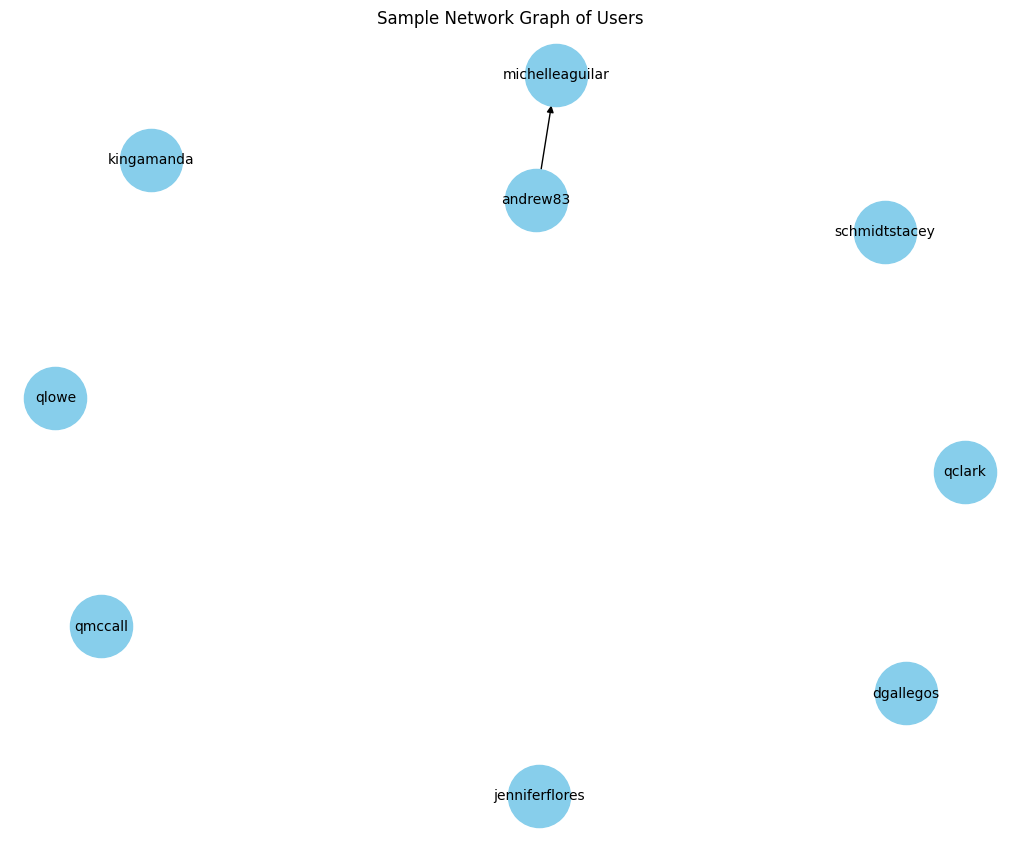

In [36]:
# Sample 10 random usernames from your dataset
sample_users = random.sample(users_df['username'].tolist(), 10)
print("Randomly selected sample users:")
print(sample_users)

# Create a subgraph containing only these users and their connections
sample_graph = G.subgraph(sample_users)

# Define a layout for the graph
layout = nx.spring_layout(sample_graph)

# Plot the graph
plt.figure(figsize=(10, 8))
nx.draw(sample_graph, pos=layout, with_labels=True, node_color='skyblue', node_size=2000, font_size=10)
plt.title('Sample Network Graph of Users')
plt.show()


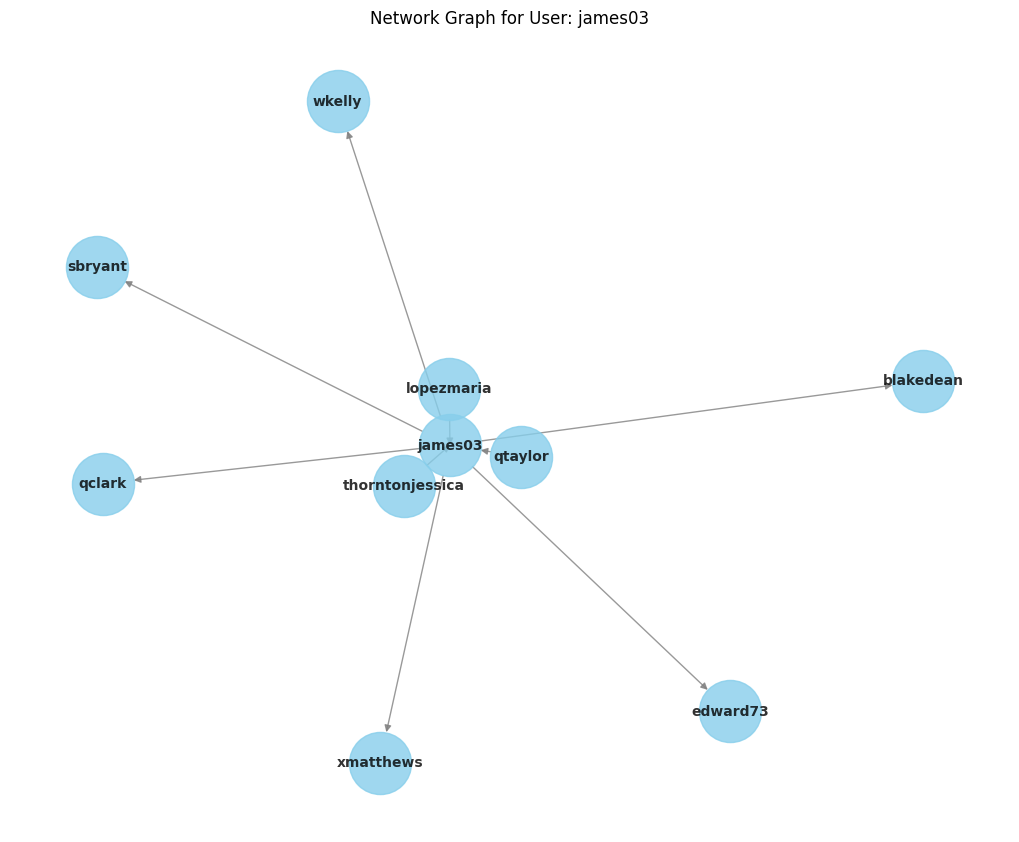

In [42]:
# Function to plot network graph for a user
def plot_user_network(username, edge_df):
    # Filter edges related to the given username
    user_edges = edges_df[(edge_df['user1'] == username) | (edges_df['user2'] == username)]
    
    # Create a directed graph
    G = nx.DiGraph()

    # Add edges to the graph
    for _, row in user_edges.iterrows():
        G.add_edge(row['user1'], row['user2'], liked=row['liked'])

    # Plotting the network graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)  # Layout for the nodes
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', linewidths=1, font_size=10, font_weight='bold', alpha=0.8)  # Drawing the graph
    plt.title(f"Network Graph for User: {username}")
    plt.show()

# Plot network graphs for each user in sample_users
for username in ['james03']:
    plot_user_network(username, edges_df)